In [1]:
import os

test_path =  os.path.join(os.getcwd(), 'cluster_data', 'mirage')

files = []

for file in os.listdir(test_path):
    if '.json' in file:
        files.append(os.path.join(test_path, file))

In [54]:
path = "D:\\CS_2_DEMOS"

print(len(os.listdir(path)))

1723


In [2]:
maps = ['vertigo', 'ancient', 'anubis', 'dust2', 'inferno', 'mirage', 'nuke']
files_per_map = {map : [] for map in maps}

for map in maps:
    test_path = os.path.join(os.getcwd(), 'cluster_data', map)
    for file in os.listdir(test_path):
        files_per_map[map].append(os.path.join(test_path, file))

In [3]:
files_per_map

{'vertigo': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\vertigo\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\vertigo\\t_data.csv'],
 'ancient': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\ancient\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\ancient\\t_data.csv'],
 'anubis': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\anubis\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\anubis\\t_data.csv'],
 'dust2': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\dust2\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\dust2\\t_data.csv'],
 'inferno': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\inferno\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\inferno\\t_data.csv'],
 'mirage': ['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\ct_data.csv',
  'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\t_data.csv']

In [45]:
from src.cluster_processor import ClusterProcessor
processors = {}

for map in maps:
    processors[map] = ClusterProcessor(files_per_map[map][0], files_per_map[map][1], min_samples=700)
    processors[map].computeClusters()

In [46]:
for map in processors:
    ct, t = processors[map].getKDRatios()
    ctClusters, tClusters = processors[map].getClusters()
    print(f"===================================================================={map}=================================================================")
    print(ctClusters)
    print("===========================================================================================================================================")
    print(tClusters)
    print("===========================================================================================================================================")
    print(ct)
    print("===========================================================================================================================================")
    print(t)
    print(f"===================================================================={map}=================================================================")

====================================================================vertigo=================================================================
{0: {'center_x': -962.7754088931788, 'center_y': -1301.3391998713, 'center_z': 11759.26391827542, 'point_count': 777}}
{0: {'center_x': -2481.209533618582, 'center_y': 547.5102496943765, 'center_z': 11753.49063997555, 'point_count': 818}}
{0: {'ct_kills': 704, 't_kills': 522, 'ct_kd_ratio': 1.3486590038314177, 't_kd_ratio': 0.7414772727272727, 'total_kills': 1226}}
{0: {'ct_kills': 336, 't_kills': 696, 'ct_kd_ratio': 0.4827586206896552, 't_kd_ratio': 2.0714285714285716, 'total_kills': 1032}}
====================================================================vertigo=================================================================
====================================================================ancient=================================================================
{}
{}
{}
{}
====================================================================

In [47]:
print(ct)

{0: {'ct_kills': 1027, 't_kills': 984, 'ct_kd_ratio': 1.04369918699187, 't_kd_ratio': 0.9581304771178188, 'total_kills': 2011}, 1: {'ct_kills': 1082, 't_kills': 256, 'ct_kd_ratio': 4.2265625, 't_kd_ratio': 0.2365988909426987, 'total_kills': 1338}}


In [48]:
ctClusters, tClusters = processors['mirage'].getClusters()
ct, t = processors['mirage'].getKDRatios()

In [49]:
for cluster in ctClusters:
    print(ctClusters[cluster])

{'center_x': -861.338251207359, 'center_y': -2342.230860751246, 'center_z': -163.38431210923724, 'point_count': 2609}
{'center_x': -746.6484775392562, 'center_y': -1307.0093538636363, 'center_z': -156.66507669504134, 'point_count': 4840}
{'center_x': -842.0893810556038, 'center_y': -97.3948197463788, 'center_z': -162.78087036316245, 'point_count': 2302}
{'center_x': -1142.9360019398257, 'center_y': -672.4971282581156, 'center_z': -178.83224380047508, 'point_count': 1263}
{'center_x': 22.059236357188528, 'center_y': -1983.7734126024588, 'center_z': -116.31245816803279, 'point_count': 976}


(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

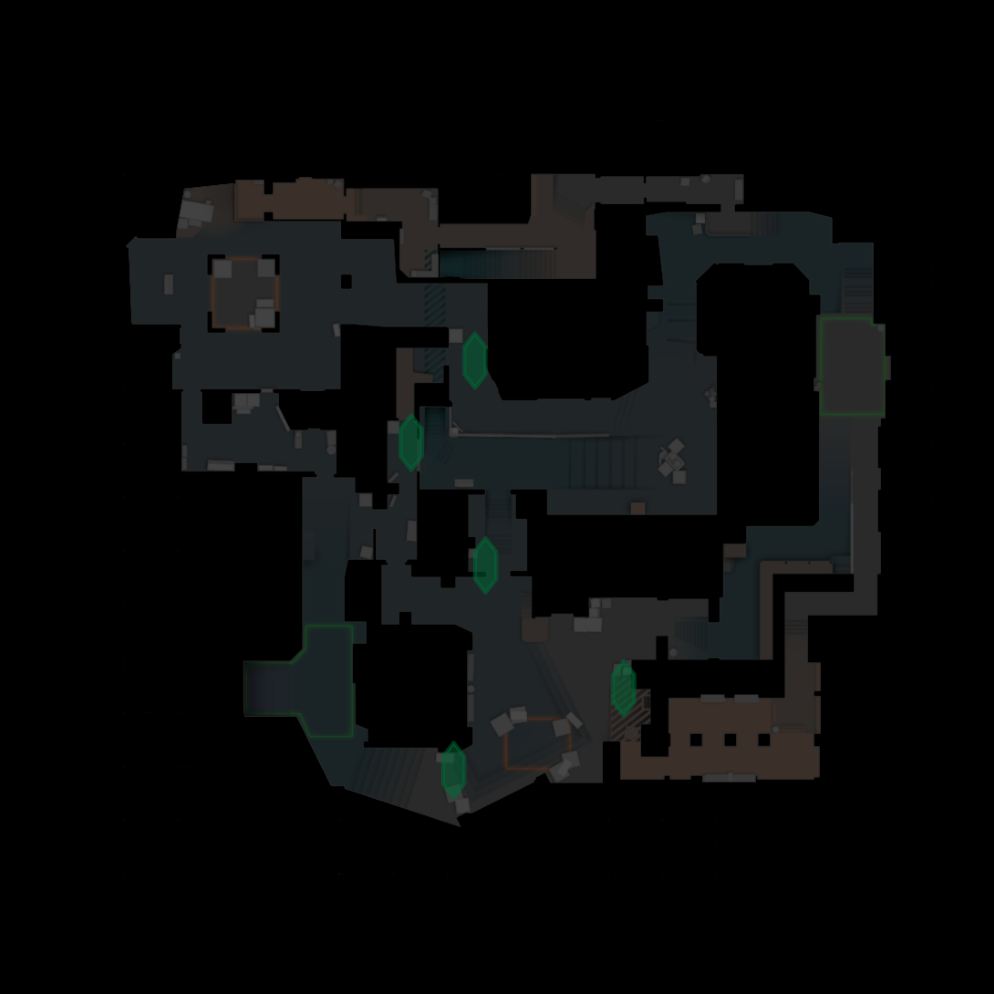

In [50]:
from awpy.plot import plot, PLOT_SETTINGS, heatmap

ctPoints = [(ctClusters[cluster]['center_x'], ctClusters[cluster]['center_y'], ctClusters[cluster]['center_z']) for cluster in ctClusters]
tPoints = [(tClusters[cluster]['center_x'], tClusters[cluster]['center_y'], tClusters[cluster]['center_z']) for cluster in tClusters]


heatmap('de_mirage', ctPoints, method='hex')

In [44]:
ct

{0: {'ct_kills': 1027,
  't_kills': 984,
  'ct_kd_ratio': 1.04369918699187,
  't_kd_ratio': 0.9581304771178188,
  'total_kills': 2011},
 1: {'ct_kills': 1082,
  't_kills': 256,
  'ct_kd_ratio': 4.2265625,
  't_kd_ratio': 0.2365988909426987,
  'total_kills': 1338}}

In [42]:
for key in ct.keys():
    print(key)
    print(type(key))

0
<class 'numpy.int64'>
1
<class 'numpy.int64'>


(-861.338251207359, -2342.230860751246, -163.38431210923724)
(-746.6484775392562, -1307.0093538636363, -156.66507669504134)
(-842.0893810556038, -97.3948197463788, -162.78087036316245)
(-1142.9360019398257, -672.4971282581156, -178.83224380047508)
(22.059236357188528, -1983.7734126024588, -116.31245816803279)


(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

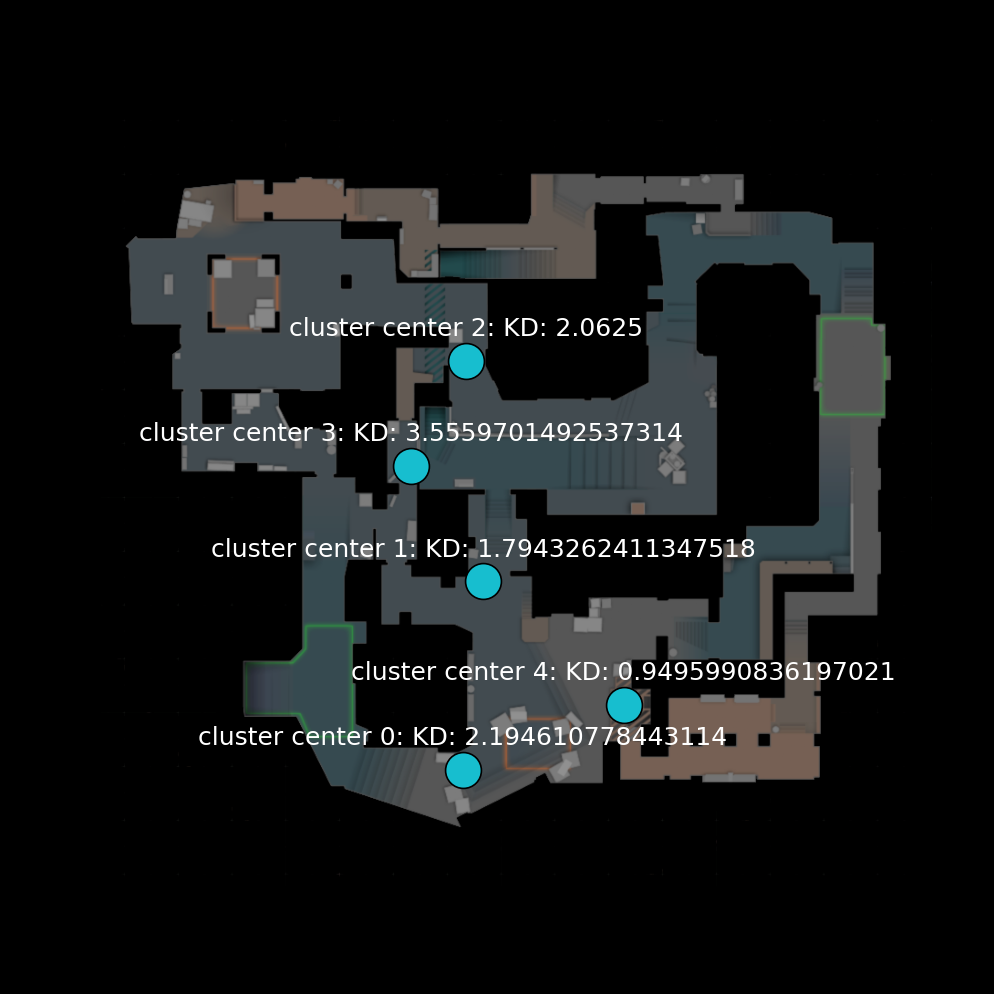

In [51]:
pointSettings = []

for i, point in enumerate(ctPoints):
    print(point)
    settings = PLOT_SETTINGS['ct'].copy()

    kd = ct[i]["ct_kd_ratio"]
    settings.update({
        "label": f"cluster center {i}: KD: {kd}"
    })
    pointSettings.append(settings)
plot('de_mirage', ctPoints, pointSettings)

(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

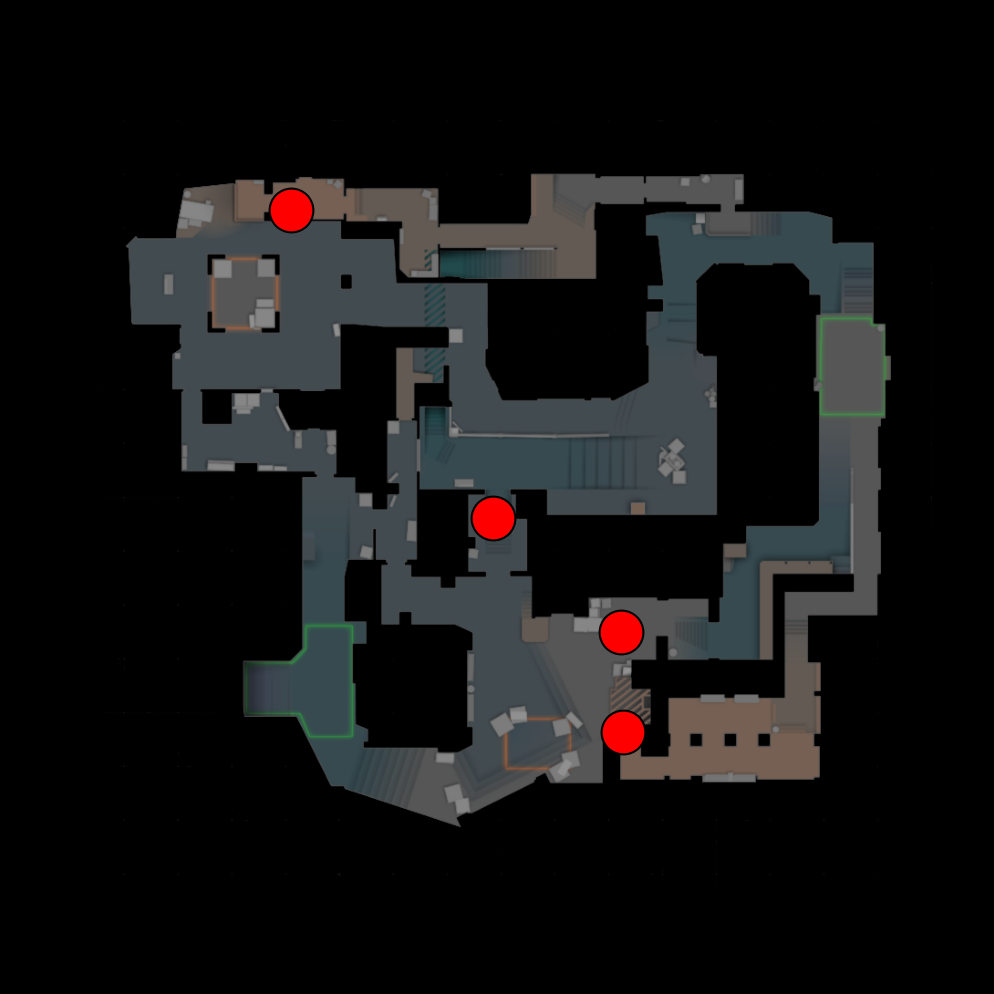

In [56]:
plot('de_mirage', tPoints)

In [40]:
files

['D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\ct_data.csv',
 'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\t_data.csv',
 'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\nuke\\ct_data.csv',
 'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\nuke\\t_data.csv']

In [31]:
test_path

'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\nuke'

In [29]:
for file in os.listdir(test_path):
    files.append(os.path.join(test_path, file))

In [3]:
with open(files[0] , 'r') as f:
    for line in f:
        print(line)

X,Y,Z,weapon

225.57431,536.16547,-254.01721,usp_silencer

-790.0251,-2436.4937,-171.41107,usp_silencer

-1161.2935,-2441.3992,-170.00012,usp_silencer

-120.95355,-581.26514,-217.96405,usp_silencer

-690.7978,-947.3534,-215.96875,usp_silencer

-798.4559,-875.381,-167.96875,m4a1_silencer

-785.33435,-914.2369,-167.96875,m4a1_silencer

-710.9864,-780.4247,-262.23322,m4a1_silencer

-870.8863,-205.07904,-167.88483,m4a1_silencer

91.9304,-2003.8975,-39.96875,mp9

-513.6028,-1621.8058,-39.968506,m4a1_silencer

-526.2516,-1453.3615,-66.0708,m4a1_silencer

-803.8733,289.5125,-165.69543,m4a1_silencer

-876.48065,184.66046,-173.02423,m4a1_silencer

-1054.3857,-1399.857,-166.28967,m4a1_silencer

-1572.9412,-2194.9143,-252.55756,m4a1_silencer

-704.8861,-838.2914,-263.96875,m4a1_silencer

-1966.2594,-1890.0364,-285.7882,awp

-1985.332,-1872.4078,-289.75134,awp

664.86066,-1654.8516,-258.64075,elite

-730.35187,-1454.5167,-167.96875,awp

-2340.915,100.27591,-167.96875,awp

-752.4319,85.39579,-165.9

In [5]:
files[0], files[1]

('D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\ct_data.csv',
 'D:\\Data_Warehouse_CS\\WPA_MODEL\\cs2\\cluster_data\\mirage\\t_data.csv')

In [20]:
processor = ClusterProcessor(files[0], files[1], min_samples=700)
processor.computeClusters()

In [21]:
ct, t = processor.getKDRatios()

In [22]:
ctClusters, tClusters = processor.getClusters()

In [23]:
ctClusters

{0: {'center_x': -861.338251207359,
  'center_y': -2342.230860751246,
  'center_z': -163.38431210923724,
  'point_count': 2609},
 1: {'center_x': -746.6484775392562,
  'center_y': -1307.0093538636363,
  'center_z': -156.66507669504134,
  'point_count': 4840},
 2: {'center_x': -842.0893810556038,
  'center_y': -97.3948197463788,
  'center_z': -162.78087036316245,
  'point_count': 2302},
 3: {'center_x': -1142.9360019398257,
  'center_y': -672.4971282581156,
  'center_z': -178.83224380047508,
  'point_count': 1263},
 4: {'center_x': 22.059236357188528,
  'center_y': -1983.7734126024588,
  'center_z': -116.31245816803279,
  'point_count': 976}}

In [24]:
tClusters

{0: {'center_x': 17.359814431269488,
  'center_y': -2132.309663752784,
  'center_z': -83.83685367093543,
  'point_count': 1796},
 1: {'center_x': 8.647597114617625,
  'center_y': -1585.2072951565913,
  'center_z': -161.6685497498179,
  'point_count': 2746},
 2: {'center_x': -695.690482544333,
  'center_y': -961.0480669622206,
  'center_z': -209.84895878643025,
  'point_count': 1297},
 3: {'center_x': -1803.7381974014336,
  'center_y': 726.1589633243727,
  'center_z': -61.13534737311828,
  'point_count': 1116}}

In [25]:
ct

{0: {'ct_kills': 733,
  't_kills': 334,
  'ct_kd_ratio': 2.194610778443114,
  't_kd_ratio': 0.45566166439290584,
  'total_kills': 1067},
 1: {'ct_kills': 1012,
  't_kills': 564,
  'ct_kd_ratio': 1.7943262411347518,
  't_kd_ratio': 0.5573122529644269,
  'total_kills': 1576},
 2: {'ct_kills': 825,
  't_kills': 400,
  'ct_kd_ratio': 2.0625,
  't_kd_ratio': 0.48484848484848486,
  'total_kills': 1225},
 3: {'ct_kills': 953,
  't_kills': 268,
  'ct_kd_ratio': 3.5559701492537314,
  't_kd_ratio': 0.2812172088142707,
  'total_kills': 1221},
 4: {'ct_kills': 829,
  't_kills': 873,
  'ct_kd_ratio': 0.9495990836197021,
  't_kd_ratio': 1.0530759951749096,
  'total_kills': 1702}}

In [26]:
t

{0: {'ct_kills': 547,
  't_kills': 1089,
  'ct_kd_ratio': 0.5022956841138659,
  't_kd_ratio': 1.9908592321755028,
  'total_kills': 1636},
 1: {'ct_kills': 462,
  't_kills': 951,
  'ct_kd_ratio': 0.48580441640378547,
  't_kd_ratio': 2.0584415584415585,
  'total_kills': 1413},
 2: {'ct_kills': 823,
  't_kills': 717,
  'ct_kd_ratio': 1.1478382147838215,
  't_kd_ratio': 0.8712029161603888,
  'total_kills': 1540},
 3: {'ct_kills': 279,
  't_kills': 702,
  'ct_kd_ratio': 0.3974358974358974,
  't_kd_ratio': 2.5161290322580645,
  'total_kills': 981}}